In [1]:
pip install numpy==1.16.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 42.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [2846 lines of output]
      Running from numpy source directory.
      /tmp/pip-install-93qurfzt/numpy_9717a26a6a3b42958c26d81a2b51bafb/numpy/distutils/misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
        return is_string(s) and ('*' in s or '?' is s)
      blas_opt_info:
      blas_mkl_info:
      customize UnixCCompiler
        FOUND:
          libraries = ['mkl_rt', 'pthread']
          library_dirs = ['/opt/conda/lib']
          define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
          include_dirs = ['/usr/local/include', '/usr/include', '/opt/conda/include']
      
        FOUND:
          libraries = ['mkl_rt', 'pthread']
          library_dirs = ['/opt/conda/lib']
          define_macros 

Importing libraries

In [42]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

Loading csv and one hot encoding char files

In [17]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.dropna()
encoder=LabelEncoder()
df.sex=encoder.fit_transform(df.sex)
df.smoker=encoder.fit_transform(df.smoker)
df.region=encoder.fit_transform(df.region)

Correlating columns and displaying

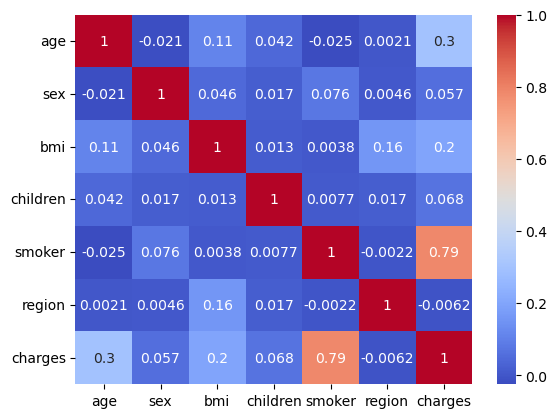

In [18]:
df=df/100
df_corr=df.corr()
sns.heatmap(df_corr,cmap='coolwarm', annot = True)
plt.show()


In [19]:
df.drop(df.columns[[1,3,5]],axis=1,inplace =True)
df.head()


,age,bmi,smoker,charges
0,0.19,0.27900,0.01,168.849240
1,0.18,0.33770,0.00,17.255523
2,0.28,0.33000,0.00,44.494620
3,0.33,0.22705,0.00,219.844706
4,0.32,0.28880,0.00,38.668552


In [20]:
x=df.iloc[:,0:3]
y=df.iloc[:,-1]

In [21]:
model=LR()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=12,shuffle=True)

In [22]:
lr=LR()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
ytrain_pred=lr.predict(xtrain)
from sklearn.metrics import r2_score
print(f"r2score of train={r2_score(ytrain,ytrain_pred)}")
print(f"r2score of test={r2_score(ytest,ypred)}")

r2score of train=0.7659927286008494
r2score of test=0.6839823336109361


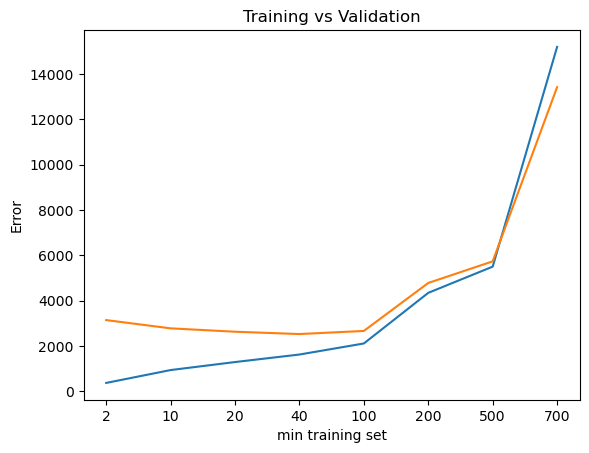

In [25]:
x_train,x_val,y_train,y_val=train_test_split(x,y,train_size=0.7,random_state=12,shuffle=True)
accuracy_list_train =[]
accuracy_list_val = []
for count in [2,10,20,40,100,200,500,700]:
    model = RandomForestRegressor(min_samples_split=count,random_state=12)
    model.fit(x_train,y_train)
    pred_train=model.predict(x_train)
    pred_val=model.predict(x_val)
    accuracy_train = mean_squared_error(pred_train,y_train)
    accuracy_val = mean_squared_error(pred_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
plt.xticks(ticks = range(len([2,10,20,40,100,200,500,700])),labels=[2,10,20,40,100,200,500,700])
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.title("Training vs Validation")
plt.xlabel("min training set")
plt.ylabel("Error")
plt.show()



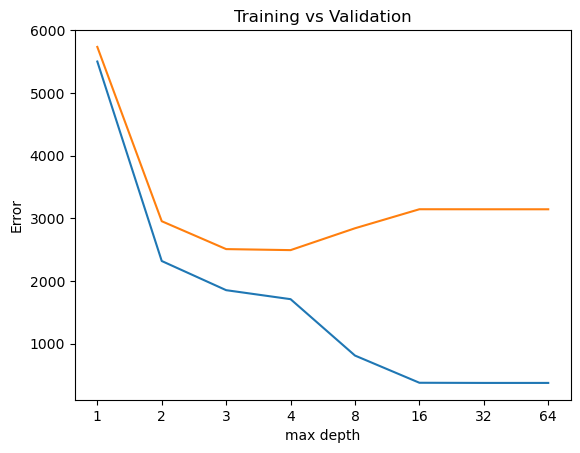

In [26]:
x_train,x_val,y_train,y_val=train_test_split(x,y,train_size=0.7,random_state=12,shuffle=True)
accuracy_list_train =[]
accuracy_list_val = []
for count in [1,2,3,4,8,16,32,64]:
    model = RandomForestRegressor(max_depth=count,random_state=12)
    model.fit(x_train,y_train)
    pred_train=model.predict(x_train)
    pred_val=model.predict(x_val)
    accuracy_train = mean_squared_error(pred_train,y_train)
    accuracy_val = mean_squared_error(pred_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
plt.xticks(ticks = range(len([1,2,3,4,8,16,32,64])),labels=[1,2,3,4,8,16,32,64])
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.title("Training vs Validation")
plt.xlabel("max depth")
plt.ylabel("Error")
plt.show()

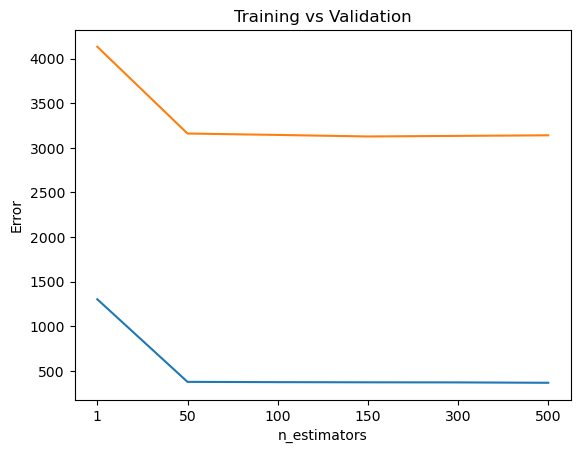

In [27]:
x_train,x_val,y_train,y_val=train_test_split(x,y,train_size=0.7,random_state=12,shuffle=True)
accuracy_list_train =[]
accuracy_list_val = []
for count in [1,50,100,150,300,500]:
    model = RandomForestRegressor(n_estimators=count,random_state=12)
    model.fit(x_train,y_train)
    pred_train=model.predict(x_train)
    pred_val=model.predict(x_val)
    accuracy_train = mean_squared_error(pred_train,y_train)
    accuracy_val = mean_squared_error(pred_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
plt.xticks(ticks = range(len([1,50,100,150,300,500])),labels=[1,50,100,150,300,500])
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.title("Training vs Validation")
plt.xlabel("n_estimators")
plt.ylabel("Error")
plt.show()

In [46]:
x_train,x_val,y_train,y_val=train_test_split(x,y,train_size=0.7,random_state=12,shuffle=True)
accuracy_list_train =[]
accuracy_list_val = []
model = RandomForestRegressor(n_estimators=150,max_depth=4,min_samples_split=40,random_state=12)
model.fit(x_train,y_train)
pred_train=model.predict(x_train)
pred_val=model.predict(x_val)
accuracy_train = mean_squared_error(pred_train,y_train)
accuracy_val = mean_squared_error(pred_val,y_val)
print(f"mean squared error of training = {accuracy_train}")
print(f"mean squared error of validation = {accuracy_val}")
print(f"r2_score of validation = {r2_score(y_val,pred_val)}")

mean squared error of training = 1783.7986398889998
mean squared error of validation = 2482.1647264596636
r2_score of validation = 0.8137402487397826


In [45]:
x_train,x_val,y_train,y_val=train_test_split(x,y,train_size=0.7,random_state=12,shuffle=True)
accuracy_list_train =[]
accuracy_list_val = []
for count in [5,10,50,100,200,500]:
    model=XGBRegressor(n_estimators=count,verbosity=1,random_state=12)
    model.fit(x_train,y_train)
    pred_train=model.predict(x_train)
    pred_val=model.predict(x_val)
    accuracy_train = mean_squared_error(pred_train,y_train)
    accuracy_val = mean_squared_error(pred_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
   
plt.xticks(ticks = range(len([5,10,50,100,200,500])),labels=[5,10,50,100,200,500])
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.title("Training vs Validation")
plt.xlabel("n_estimators")
plt.ylabel("Error")
plt.show()    
print(f"r2_score = {r2_score(y_val,pred_val)}")
    
    
    


r2_score = 0.7372663851742239


In [35]:
x_train,x_val,y_train,y_val=train_test_split(x,y,train_size=0.7,random_state=12,shuffle=True)
model=XGBRegressor(n_estimators=10,verbosity=1,random_state=12)
model.fit(x_train,y_train,eval_set = [(x_val,y_val)],early_stopping_rounds=10)
pred_train=model.predict(x_train)
pred_val=model.predict(x_val)
accuracy_train = mean_squared_error(pred_train,y_train)
accuracy_val = mean_squared_error(pred_val,y_val)
print(f"mean squared error of training = {accuracy_train}")
print(f"mean squared error of validation = {accuracy_val}")

[0]	validation_0-rmse:126.00457
[1]	validation_0-rmse:96.36468
[2]	validation_0-rmse:76.95785
[3]	validation_0-rmse:65.62143
[4]	validation_0-rmse:58.78282
[5]	validation_0-rmse:55.09532
[6]	validation_0-rmse:53.35562
[7]	validation_0-rmse:52.89247
[8]	validation_0-rmse:52.69954
[9]	validation_0-rmse:52.49458
mean squared error of training = 1132.5988359909188
mean squared error of validation = 2755.6805531084265


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [36]:
model.best_iteration

9